In [4]:
from sklearn_ubu.disturbing_neighbors import DisturbingNeighbors
from sklearn_ubu.disturbing_neighbors import BaseDisturbingNeighbors
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import hamming_loss
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz

from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
#from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [5]:
seed = 1

X,y=make_multilabel_classification(n_samples=60, n_features=10, random_state=seed) 

dn=BaseDisturbingNeighbors(base_estimator=DecisionTreeClassifier(max_depth=3),random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5, 
                                                    random_state=seed)

In [6]:
arbol=dn.fit(X_train,y_train)

y_predict=dn.predict(X_test)

y_predict_proba=dn.predict_proba(X_test)

dist=hamming_loss(y_test, y_predict)
print(dist) 


0.3


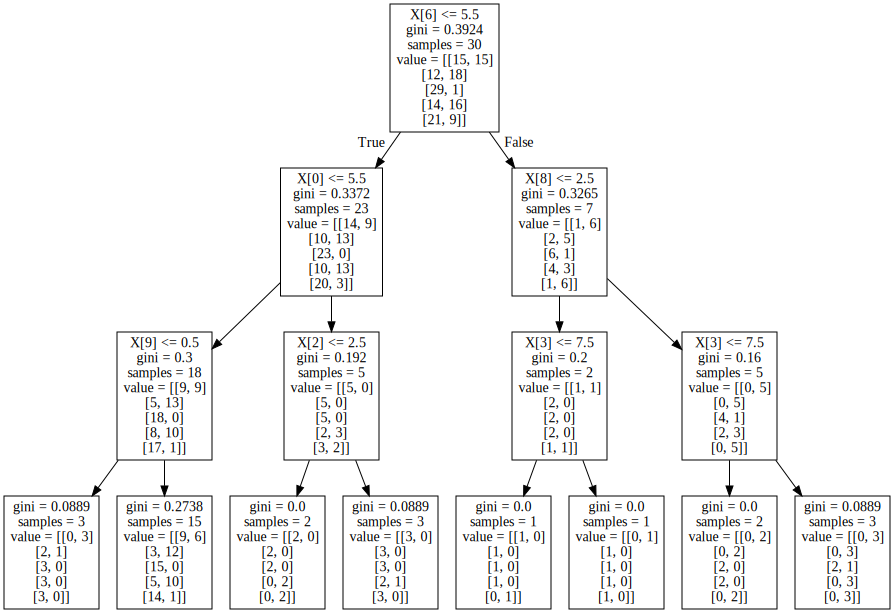

In [7]:
dot_data = export_graphviz(arbol, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [8]:
scores = cross_val_score(dn, X, y, cv=5)
print(scores)

[ 0.33333333  0.08333333  0.41666667  0.33333333  0.41666667]
